In [1]:
from simulation import (
    HistoricalACWIIMIReturns,
    Historical1YearUSBondYields,
    HistoricalGermanInflation,
    MonteCarloSimulation,
    ResultPlotter
)

[Taichi] version 1.6.0, llvm 15.0.4, commit f1c6fbbd, linux, python 3.11.6


[I 11/30/23 19:05:22.897 33388] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


In [2]:
NUM_SIMULATIONS = 300_000
CAPITAL_GAINS_TAX_RATE = 0.278186
ETF_TAX_EXEMPTION = 0.3

In [3]:
sim = MonteCarloSimulation(
    num_sim=NUM_SIMULATIONS,
    capital_gains_tax_rate=CAPITAL_GAINS_TAX_RATE,
    investment_tax_exemption=ETF_TAX_EXEMPTION,
    investment_return_gen=HistoricalACWIIMIReturns(),
    safe_deposit_rate_gen=Historical1YearUSBondYields(),
    inflation_rate_gen=HistoricalGermanInflation()
)

HistoricalACWIIMIReturns
  Annualized increase:    6.3%
  Annualized volatility: 15.3%

Historical1YearUSBondYields
  Annualized increase:    4.9%
  Annualized volatility:  0.9%

HistoricalGermanInflation
  Annualized increase:    2.7%
  Annualized volatility:  1.0%

[Taichi] Starting on arch=cuda


,Resulting Wealth
Percentiles,
0.01,"70,059.74"
0.05,"86,067.77"
0.10,"95,943.51"
0.25,"112,624.05"
0.50,"134,681.84"
0.75,"162,451.04"
0.90,"193,529.13"


Average resulting wealth:                   140,795
Average resulting wealth only safe deposit: 121,474
Fraction of Worse Outcomes compared to not investing: 34.9%
Conditional mean loss: -18961.1
Total payment: 130000


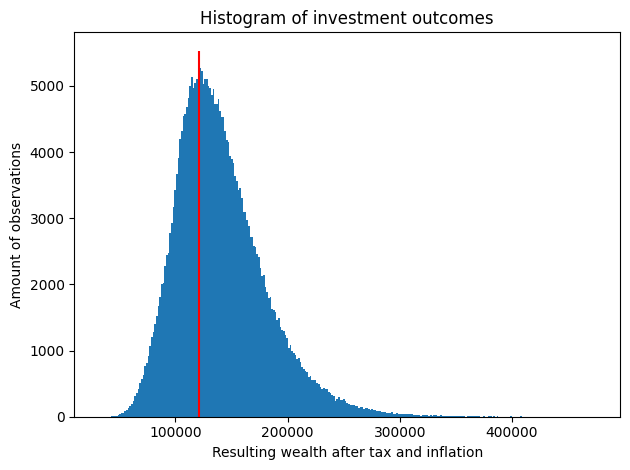

In [4]:
sim(
    num_years=10,
    current_invest=10_000,
    current_save=0,
    monthly_invest=1_000,
    monthly_save=0
)